In [ ]:
!pip install numpy matplotlib tensorflow torch torchvision


In [ ]:
!pip install notebook


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.9 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations including normalization and augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load training and testing datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170M/170M [00:05<00:00, 30.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import torch
import torchvision.models as models

# Load VGG-16 and modify for CIFAR-10
vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = torch.nn.Linear(4096, 10)

# Load ResNet-18 and modify for CIFAR-10
resnet18 = models.resnet18(pretrained=True)
resnet18.fc = torch.nn.Linear(resnet18.fc.in_features, 10)

# If using GPU, move models to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)
resnet18 = resnet18.to(device)

print("Models loaded and modified for CIFAR-10.")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
 

Models loaded and modified for CIFAR-10.


Files already downloaded and verified
Files already downloaded and verified
[Epoch 1, Batch 50] loss: 2.319
[Epoch 1, Batch 100] loss: 2.063
[Epoch 1, Batch 150] loss: 1.949
[Epoch 1, Batch 200] loss: 1.880
[Epoch 1, Batch 250] loss: 1.854
[Epoch 1, Batch 300] loss: 1.850
[Epoch 1, Batch 350] loss: 1.798
Training time for epoch 1: 21.08 seconds
Validation Accuracy after epoch 1: 37.44%
[Epoch 2, Batch 50] loss: 1.775
[Epoch 2, Batch 100] loss: 1.771
[Epoch 2, Batch 150] loss: 1.752
[Epoch 2, Batch 200] loss: 1.749
[Epoch 2, Batch 250] loss: 1.732
[Epoch 2, Batch 300] loss: 1.758
[Epoch 2, Batch 350] loss: 1.750
Training time for epoch 2: 21.74 seconds
Validation Accuracy after epoch 2: 39.67%
[Epoch 3, Batch 50] loss: 1.716
[Epoch 3, Batch 100] loss: 1.716
[Epoch 3, Batch 150] loss: 1.717
[Epoch 3, Batch 200] loss: 1.722
[Epoch 3, Batch 250] loss: 1.706
[Epoch 3, Batch 300] loss: 1.697
[Epoch 3, Batch 350] loss: 1.682
Training time for epoch 3: 20.25 seconds
Validation Accuracy after e

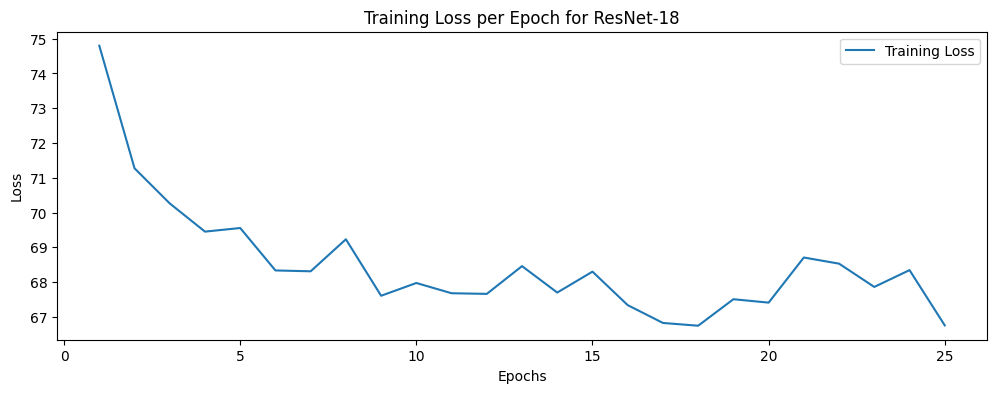

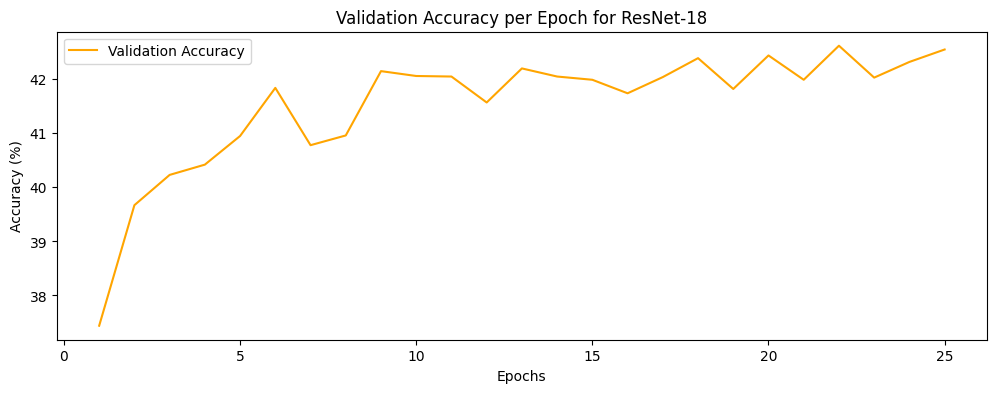

In [3]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Data Preprocessing
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Load and modify ResNet-18 for CIFAR-10
resnet18 = models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')
for param in resnet18.parameters():
    param.requires_grad = False  # Freeze all layers

# Modify the final layer for CIFAR-10
resnet18.fc = torch.nn.Linear(resnet18.fc.in_features, 10)
resnet18 = resnet18.to(device)

# Hyperparameters
learning_rate = 0.001
epochs = 25

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.fc.parameters(), lr=learning_rate, momentum=0.9)

# Training loop with tracking of metrics
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    # Start timing
    start_time = time.time()

    running_loss = 0.0
    resnet18.train()  # Set model to training mode

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 50 == 49:  # Print every 50 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 50:.3f}")
            running_loss = 0.0

    # Track training loss for the epoch
    train_losses.append(running_loss)

    # End timing
    end_time = time.time()
    epoch_duration = end_time - start_time
    print(f"Training time for epoch {epoch + 1}: {epoch_duration:.2f} seconds")

    # Validation loop
    resnet18.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = resnet18(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print(f"Validation Accuracy after epoch {epoch + 1}: {val_accuracy:.2f}%")

print('Finished Training')

# Evaluation on the test set
all_preds = []
all_labels = []

resnet18.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Test Accuracy for ResNet-18: {accuracy:.2f}")
print(f"Precision for ResNet-18: {precision:.2f}")
print(f"Recall for ResNet-18: {recall:.2f}")
print(f"F1 Score for ResNet-18: {f1:.2f}")

# Plotting Training Loss and Validation Accuracy
epochs_range = range(1, epochs + 1)

# Plot training loss
plt.figure(figsize=(12, 4))
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch for ResNet-18')
plt.legend()
plt.show()

# Plot validation accuracy
plt.figure(figsize=(12, 4))
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch for ResNet-18')
plt.legend()
plt.show()


In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model Training Function
def train_and_evaluate_model(model_name, model, trainloader, testloader, learning_rate=0.001, epochs=25):
    # Modify the final layer for CIFAR-10 if necessary
    if model_name.startswith('ResNet'):
        model.fc = torch.nn.Linear(model.fc.in_features, 10)
    elif model_name.startswith('VGG'):
        model.classifier[6] = torch.nn.Linear(4096, 10)

    model = model.to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate, momentum=0.9)

    # Training loop
    train_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # Start timing
        start_time = time.time()

        running_loss = 0.0
        model.train()  # Set model to training mode

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 50 == 49:  # Print every 50 mini-batches
                print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 50:.3f}")
                running_loss = 0.0

        # Track training loss for the epoch
        train_losses.append(running_loss)

        # End timing
        end_time = time.time()
        epoch_duration = end_time - start_time
        print(f"Training time for epoch {epoch + 1}: {epoch_duration:.2f} seconds")

        # Validation loop
        model.eval()  # Set model to evaluation mode
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)
        print(f"Validation Accuracy after epoch {epoch + 1}: {val_accuracy:.2f}%")

    print('Finished Training')

    # Evaluation on the test set
    all_preds = []
    all_labels = []

    model.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Test Accuracy for {model_name}: {accuracy:.2f}")
    print(f"Precision for {model_name}: {precision:.2f}")
    print(f"Recall for {model_name}: {recall:.2f}")
    print(f"F1 Score for {model_name}: {f1:.2f}")

    # Return metrics for summary table
    avg_epoch_time = sum([epoch_duration for _ in range(epochs)]) / epochs
    return accuracy, precision, recall, f1, avg_epoch_time

# Loading the CIFAR-10 dataset (as before)
import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Define the models to train
models_to_train = {
    'ResNet-18': models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1'),
    'VGG-16': models.vgg16(weights='VGG16_Weights.IMAGENET1K_V1'),
    'VGG-19': models.vgg19(weights='VGG19_Weights.IMAGENET1K_V1'),
    'ResNet-34': models.resnet34(weights='ResNet34_Weights.IMAGENET1K_V1'),
    'ResNet-50': models.resnet50(weights='ResNet50_Weights.IMAGENET1K_V1')
}

# Train and evaluate each model
summary_table = []

for model_name, model in models_to_train.items():
    print(f"Training {model_name}...")
    accuracy, precision, recall, f1, avg_epoch_time = train_and_evaluate_model(
        model_name, model, trainloader, testloader, learning_rate=0.001, epochs=3)
    num_params = sum(p.numel() for p in model.parameters())
    summary_table.append({
        'Model': model_name,
        'Test Accuracy (%)': round(accuracy * 100, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1 Score': round(f1, 2),
        'Training Time (per epoch)': round(avg_epoch_time, 2),
        'Number of Parameters': num_params
    })

# Print the summary table
import pandas as pd

summary_df = pd.DataFrame(summary_table)
print(summary_df)


100%|██████████| 170M/170M [00:03<00:00, 43.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 87.7MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 105MB/s]
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 79.8MB/s]
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 130MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 133MB/s]


Training ResNet-18...
[Epoch 1, Batch 50] loss: 2.051
[Epoch 1, Batch 100] loss: 1.545
[Epoch 1, Batch 150] loss: 1.358
[Epoch 1, Batch 200] loss: 1.248
[Epoch 1, Batch 250] loss: 1.147
[Epoch 1, Batch 300] loss: 1.104
[Epoch 1, Batch 350] loss: 1.049
Training time for epoch 1: 26.42 seconds
Validation Accuracy after epoch 1: 67.45%
[Epoch 2, Batch 50] loss: 0.958
[Epoch 2, Batch 100] loss: 0.971
[Epoch 2, Batch 150] loss: 0.915
[Epoch 2, Batch 200] loss: 0.886
[Epoch 2, Batch 250] loss: 0.886
[Epoch 2, Batch 300] loss: 0.856
[Epoch 2, Batch 350] loss: 0.841
Training time for epoch 2: 24.44 seconds
Validation Accuracy after epoch 2: 72.92%
[Epoch 3, Batch 50] loss: 0.758
[Epoch 3, Batch 100] loss: 0.805
[Epoch 3, Batch 150] loss: 0.778
[Epoch 3, Batch 200] loss: 0.778
[Epoch 3, Batch 250] loss: 0.775
[Epoch 3, Batch 300] loss: 0.749
[Epoch 3, Batch 350] loss: 0.776
Training time for epoch 3: 25.33 seconds
Validation Accuracy after epoch 3: 75.14%
Finished Training
Test Accuracy for Res